# Modeling

## Import Libraries and Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

plt.style.use('seaborn')
df = pd.read_csv('data/housing_aspects.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,1800,7503


In [2]:
df = df.round()
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.136300e+04,21363.000000,21363.000000,21363.000000,2.136300e+04,21363.000000,21363.000000,21363.000000,21363.000000,21363.000000,21363.000000,21363.000000,21363.000000,21363.000000,21363.000000,21363.000000
mean,5.291410e+05,3.347891,2.034452,2051.320414,1.490590e+04,1.530543,0.006179,0.225530,3.411319,7.635257,1765.825820,279.763001,1970.883865,67.547676,1976.118429,12634.737350
std,3.295713e+05,0.865457,0.709672,861.820882,4.082387e+04,0.554105,0.078365,0.750414,0.651270,1.144710,788.769002,429.000937,29.344921,360.927648,672.261019,26548.925485
min,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.200000e+05,3.000000,2.000000,1420.000000,5.030000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1480.000000,5100.000000
50%,4.500000e+05,3.000000,2.000000,1900.000000,7.590000e+03,2.000000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1975.000000,0.000000,1830.000000,7611.000000
75%,6.370000e+05,4.000000,2.000000,2520.000000,1.058350e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,530.000000,1996.000000,0.000000,2350.000000,10040.000000
max,4.490000e+06,6.000000,4.000000,7850.000000,1.651359e+06,4.000000,1.000000,4.000000,5.000000,13.000000,7850.000000,3500.000000,2015.000000,2015.000000,6210.000000,871200.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21363 entries, 0 to 21362
Data columns (total 16 columns):
price            21363 non-null float64
bedrooms         21363 non-null int64
bathrooms        21363 non-null float64
sqft_living      21363 non-null int64
sqft_lot         21363 non-null int64
floors           21363 non-null float64
waterfront       21363 non-null float64
view             21363 non-null float64
condition        21363 non-null int64
grade            21363 non-null int64
sqft_above       21363 non-null int64
sqft_basement    21363 non-null float64
yr_built         21363 non-null int64
yr_renovated     21363 non-null float64
sqft_living15    21363 non-null int64
sqft_lot15       21363 non-null int64
dtypes: float64(7), int64(9)
memory usage: 2.6 MB


## Linear Regression


## Check for Multicolinearity

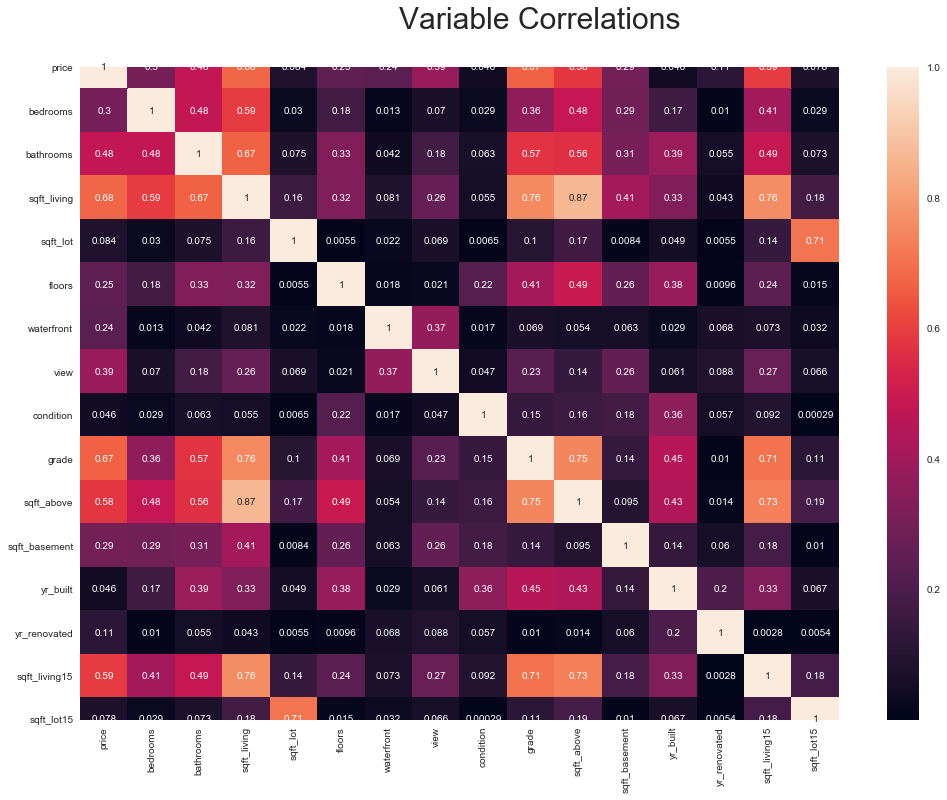

In [4]:
corr = df.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95)
heatmap = sns.heatmap(corr, annot=True)
heatmap

In [5]:
features = []
correlations = []
for idx, correlation in corr['price'].T.iteritems():
    if correlation >= .30 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features}).sort_values(by=['Correlations'], ascending=False)

In [6]:
# usually any variables that correlate more than 80%
multicollinear_features = []
multicollinear_corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .80 and idx != feature:
            multicollinear_features.append([feature, idx])
            multicollinear_corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':multicollinear_corr, 'Features': multicollinear_features})
print('Multicollinear Features')
display(MC_df)
print('Correlations with Price')
display(corr_price_df)

Multicollinear Features


,Correlations,Features
0,0.866887,"[sqft_living, sqft_above]"
1,0.866887,"[sqft_above, sqft_living]"


Correlations with Price


,Correlations,Features
2,0.677596,sqft_living
4,0.668335,grade
6,0.593674,sqft_living15
5,0.578363,sqft_above
1,0.479956,bathrooms
3,0.386696,view
0,0.302105,bedrooms


In [7]:
# either sqft_living or sqft_above has to be dropped to elminate any multicolinearity
# the heatmap and correlations with price chart give us a good idea of what columns work best with price
# check for linearity in columns that have the most correlations with price
price = df['price']
bath = df['bathrooms']
bed = df['bedrooms']
grade = df['grade']
sqft_living15 = df['sqft_living15']
floors = df['floors']
view = df['view']
sqft_living = df['sqft_living']
sqft_above = df['sqft_above']

C:\Users\daveb\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 576x396 with 0 Axes>

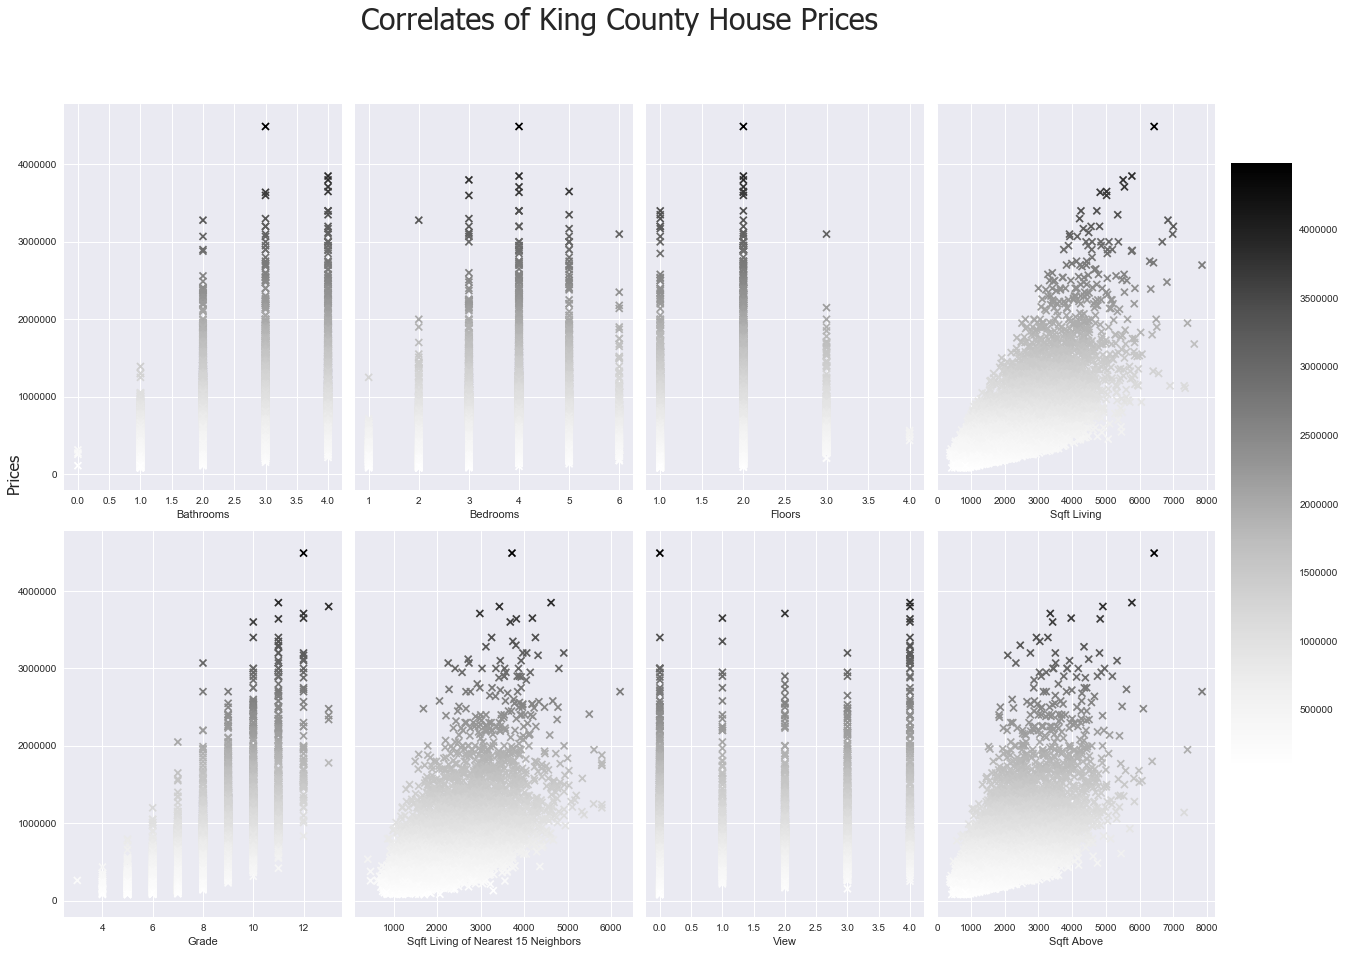

In [8]:
f = plt.figure()
f, axes = plt.subplots(nrows = 2, ncols = 4, sharex=False, sharey = True, figsize=(17,12))

f.suptitle('Correlates of King County House Prices', fontsize=30, y=1.1, fontname='Tahoma')
f.text(0.0001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16, fontname='Tahoma')

sc = axes[0][0].scatter(bath, price, c = price, marker = "x")
axes[0][0].set_xlabel('Bathrooms')

axes[0][1].scatter(bed, price, c = price, marker = "x")
axes[0][1].set_xlabel('Bedrooms')

axes[1][0].scatter(grade, price, c = price, marker = "x")
axes[1][0].set_xlabel('Grade')

axes[1][1].scatter(sqft_living15, price, c = price, marker = "x")
axes[1][1].set_xlabel('Sqft Living of Nearest 15 Neighbors')

axes[0][2].scatter(floors, price, c = price, marker = "x")
axes[0][2].set_xlabel('Floors')

axes[1][2].scatter(view, price, c = price, marker = "x")
axes[1][2].set_xlabel('View')

sc = axes[0][3].scatter(sqft_living, price, c = price, marker = "x")
axes[0][3].set_xlabel('Sqft Living')

sc = axes[1][3].scatter(sqft_above, price, c = price, marker = "x")
axes[1][3].set_xlabel('Sqft Above')


cbar_ax = f.add_axes([1, 0.22, 0.05, 0.7])
f.colorbar(sc, cbar_ax)

f.tight_layout()
plt.show()

In [9]:
# bedrooms, floors and view are not linear
# sqft_living is more linear than sqft_above so it will be the column included

## Model 1

In [10]:
model1 = smf.ols(formula="price ~ bathrooms + grade + sqft_living + sqft_living15", data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     5751.
Date:                Tue, 15 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:26:11   Log-Likelihood:            -2.9393e+05
No. Observations:               21363   AIC:                         5.879e+05
Df Residuals:                   21358   BIC:                         5.879e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -5.8e+05   1.24e+04    -46.817      0.000   -6.04e+05   -5.56e+05
bathrooms      4201.5450   3018.262      1.392      0.164   -1714.476    1.01e+04
grade          9.766e+04   2220.455     43.982      0.000    9.33e+04    1.02e+05
sqft_living     135.8791      3.540     38.379      0.000     128.940     142.819
sqft_living15    38.5859      3.802     10.149      0.000      31.134      46.038
==============================================================================
Omnibus:                    12083.576   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           198404.844
Skew:                           2.381   Prob(JB):                         0.00
Kurtosis:                      17.150   Cond. No.                     2.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\daveb\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


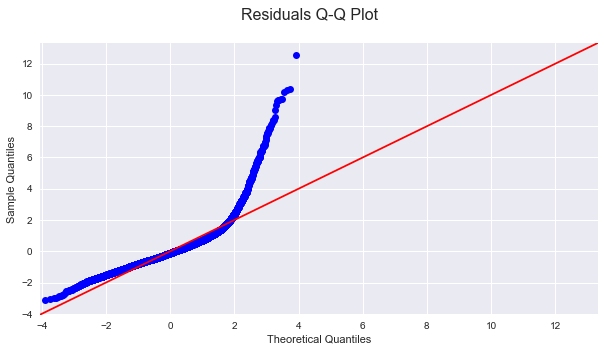

In [13]:
residuals = model1.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals Q-Q Plot', fontsize=16)
fig.set_size_inches(10,5)
fig.show()

## Model 2

### Normalize the Dependant Variable

In [14]:
df['price'] = np.log(df['price'])

In [15]:
model2 = smf.ols(formula="price ~ bathrooms + grade + sqft_living + sqft_living15", data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     6136.
Date:                Tue, 15 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:28:43   Log-Likelihood:                 47012.
No. Observations:               21363   AIC:                        -9.401e+04
Df Residuals:                   21358   BIC:                        -9.397e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.4258      0.001   1671.017      0.000       2.423       2.429
bathrooms         0.0022      0.000      6.335      0.000       0.002       0.003
grade             0.0128      0.000     49.246      0.000       0.012       0.013
sqft_living    1.318e-05   4.15e-07     31.781      0.000    1.24e-05     1.4e-05
sqft_living15  5.989e-06   4.45e-07     13.445      0.000    5.12e-06    6.86e-06
==============================================================================
Omnibus:                       51.126   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.168
Skew:                           0.018   Prob(JB):                     1.15e-09
Kurtosis:                       2.788   Cond. No.                     2.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\daveb\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


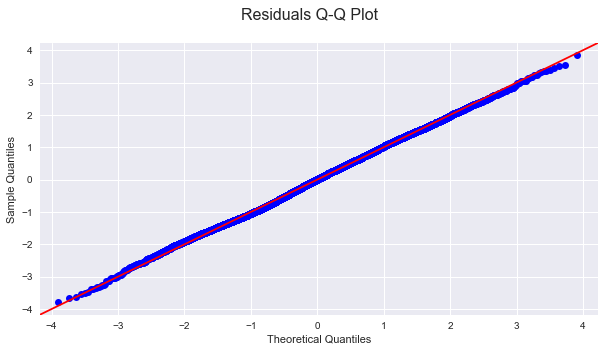

In [32]:
residuals = model2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals Q-Q Plot', fontsize=16)
fig.set_size_inches(10,5)
fig.show()

## Simple Linear Regression Relationships

In [17]:
def model_diagnostic(model, x, x_name, y):    
    
    residuals = model1.resid
    
    f = plt.figure()
    f, axes = plt.subplots(nrows = 1, ncols = 3, sharex=False, sharey = False, figsize=(65,20), squeeze=False)
    
    f.text(s="Model Diagnostic Summary", x=.40, y=1.15, fontsize=65, fontname='serif')
    f.text(s="r-Squared: {r}".format(r=round(model.rsquared, 2)), x=.40, y=1.05, fontsize=50, fontname='serif')
    f.text(s="p-value: {p}".format(p= model1.f_pvalue), x=.53, y=1.05, fontsize=50, fontname='serif')
    
    f.text(s='Residuals Histogram', x=.45, y=.93, fontsize=55, fontname='serif')
    
    sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=axes[0][0])    
    plt.show;
    
    f.text(s='QQ Plot', x=.20, y=.93, fontsize=55, fontname='serif')
    
    axes[0][1].hist(residuals)
    plt.show;
    
    sns.residplot(x, y, ax=axes[0][2])
 
    f.text(s='Residuals vs {x}'.format(x=x_name), x=.73, y=.93, fontsize=55, fontname='serif')
    plt.tight_layout;
    plt.show;

### Bathrooms

<Figure size 576x396 with 0 Axes>

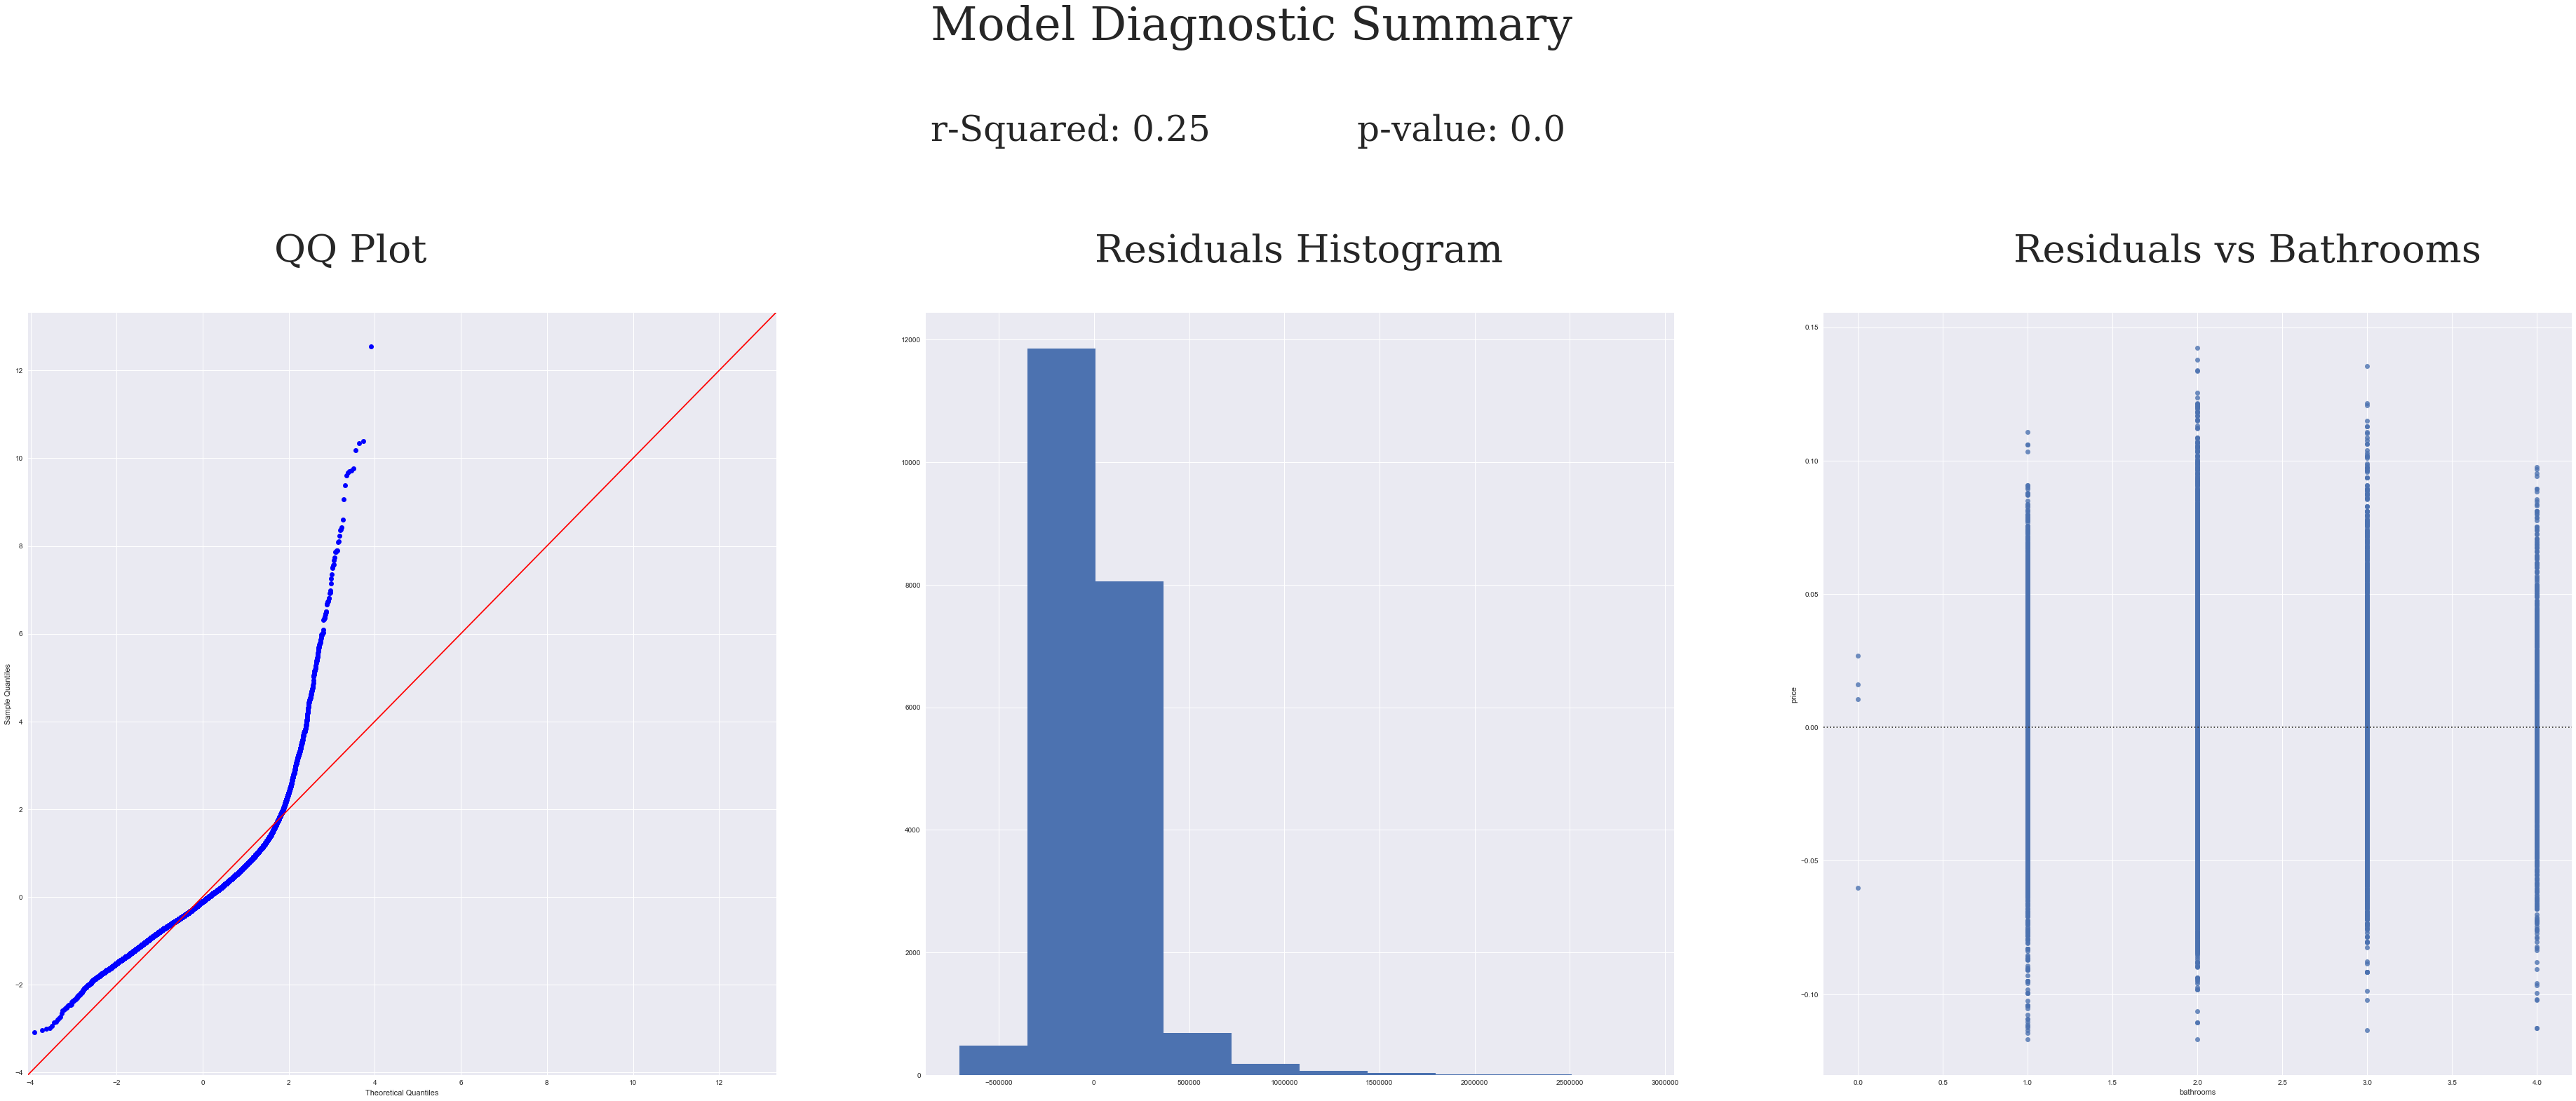

In [18]:
f = "bathrooms~price"
bath_model = smf.ols(formula=f, data=df).fit()
model_diagnostic(bath_model, bath, 'Bathrooms', price)

In [19]:
#df['bathrooms'] = np.log(df['bathrooms'])

In [20]:
#f = "price~bathrooms"
#bath_model = ols(formula=f, data=df).fit()
#model_diagnostic(bath_model, df['bathrooms'], 'bathrooms', price)

### Grade

<Figure size 576x396 with 0 Axes>

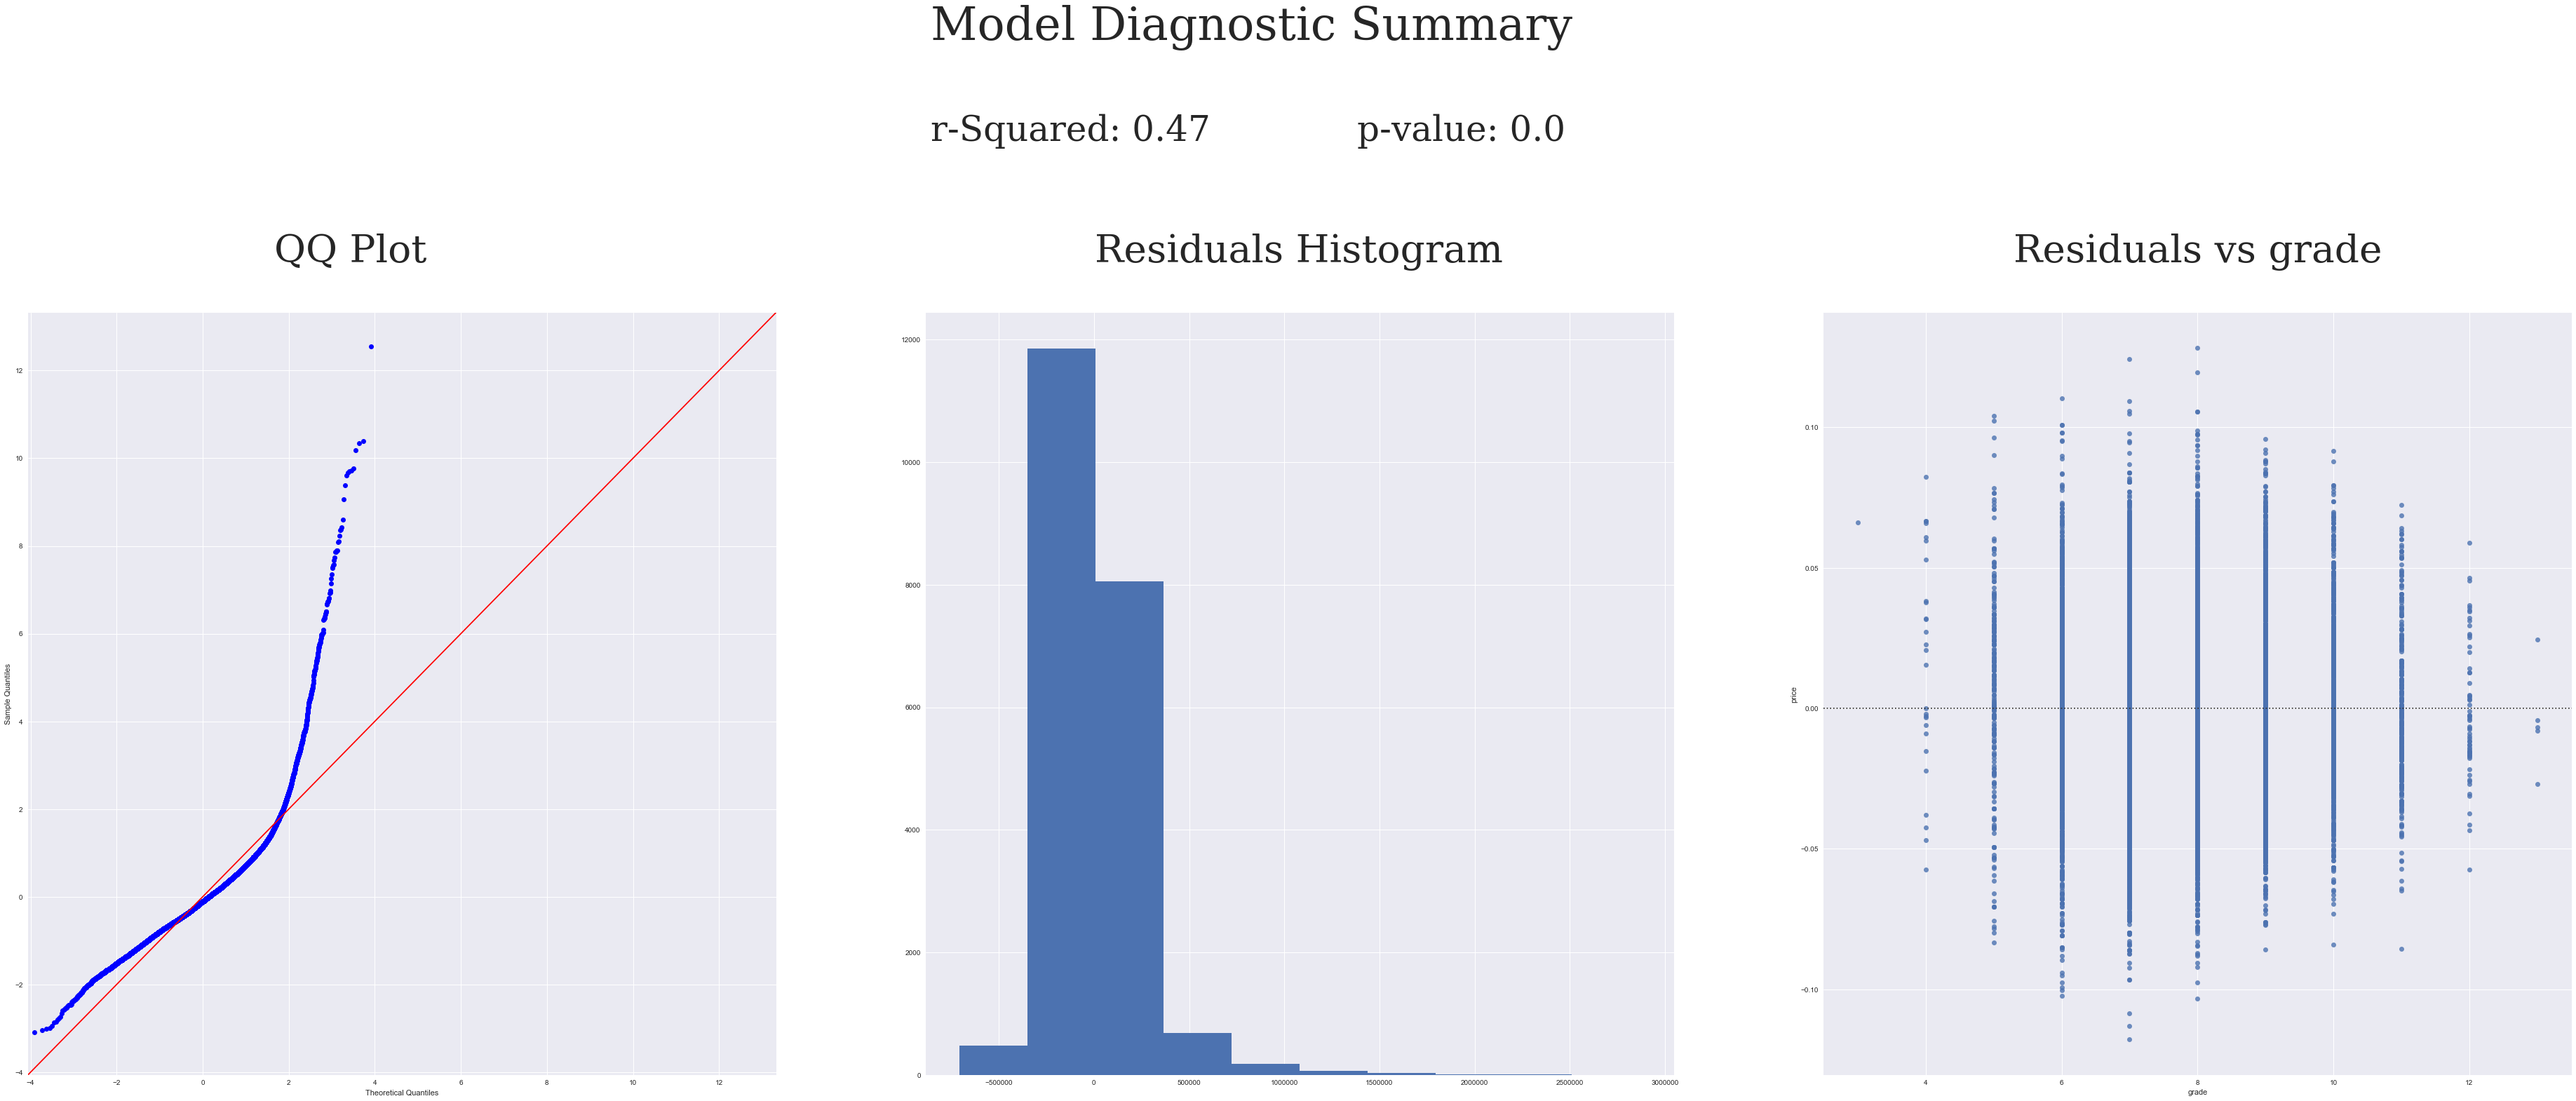

In [21]:
f = 'grade~price'
grade_model = smf.ols(formula=f, data=df).fit()
model_diagnostic(grade_model, df['grade'], 'grade', price)

In [22]:
#df['grade'] = np.log(df['grade'])

In [23]:
#f = "price~grade"
#grade_model = ols(formula=f, data=df).fit()
#model_diagnostic(grade_model, df['grade'], 'grade', price)

### Sqft Living

<Figure size 576x396 with 0 Axes>

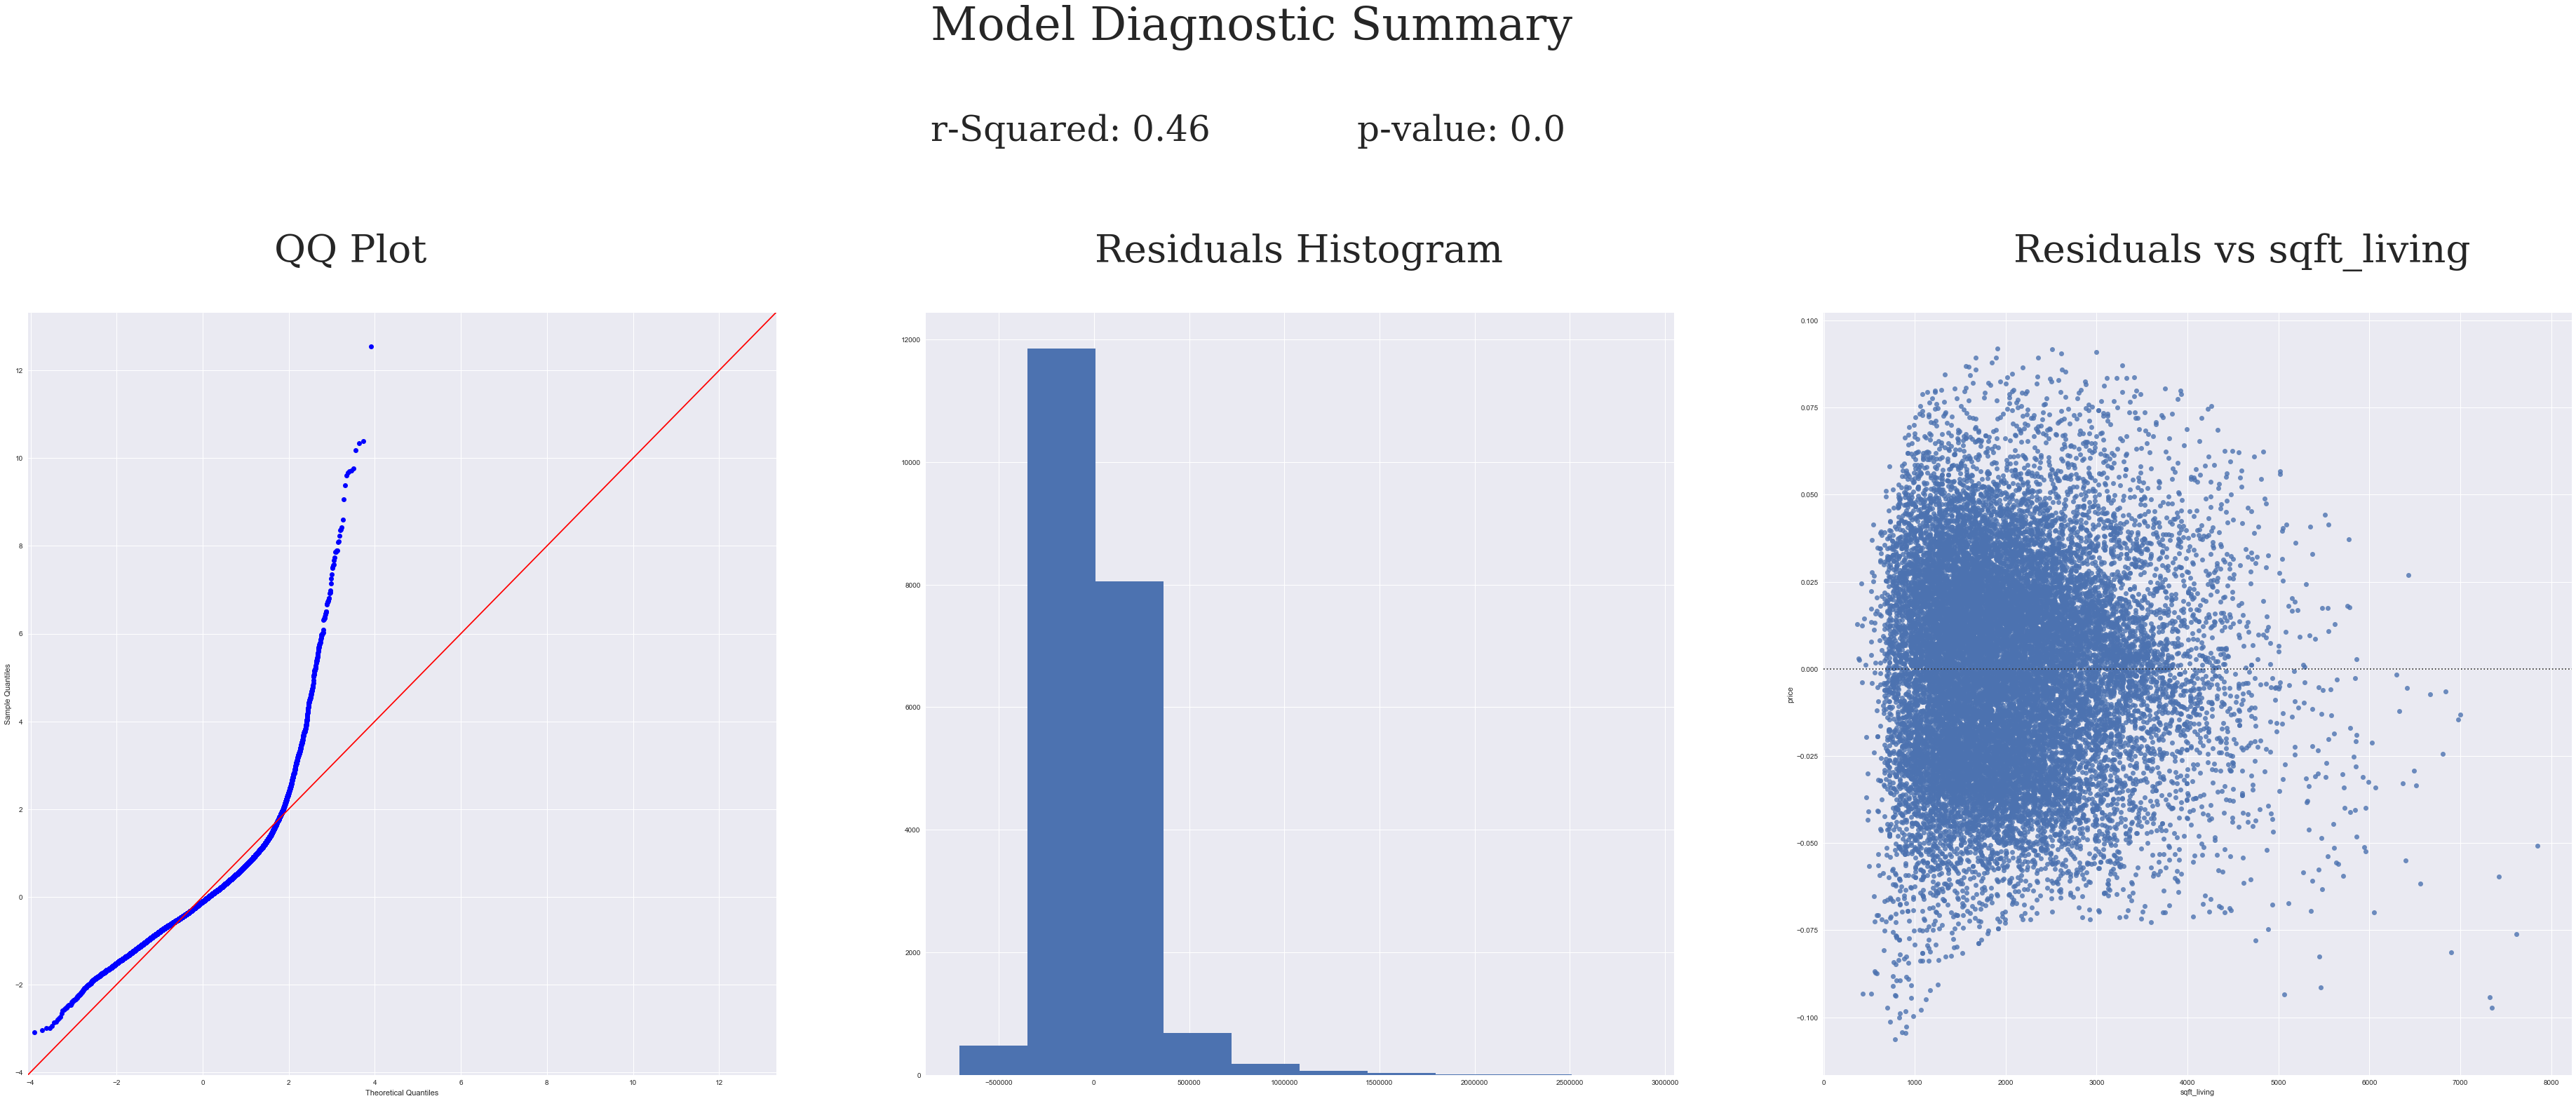

In [24]:
f = 'price~sqft_living'
sqft_living_model = smf.ols(formula=f, data=df).fit()
model_diagnostic(sqft_living_model, sqft_living, 'sqft_living', price)

In [25]:
df['sqft_living'] = np.log(df['sqft_living'])

<Figure size 576x396 with 0 Axes>

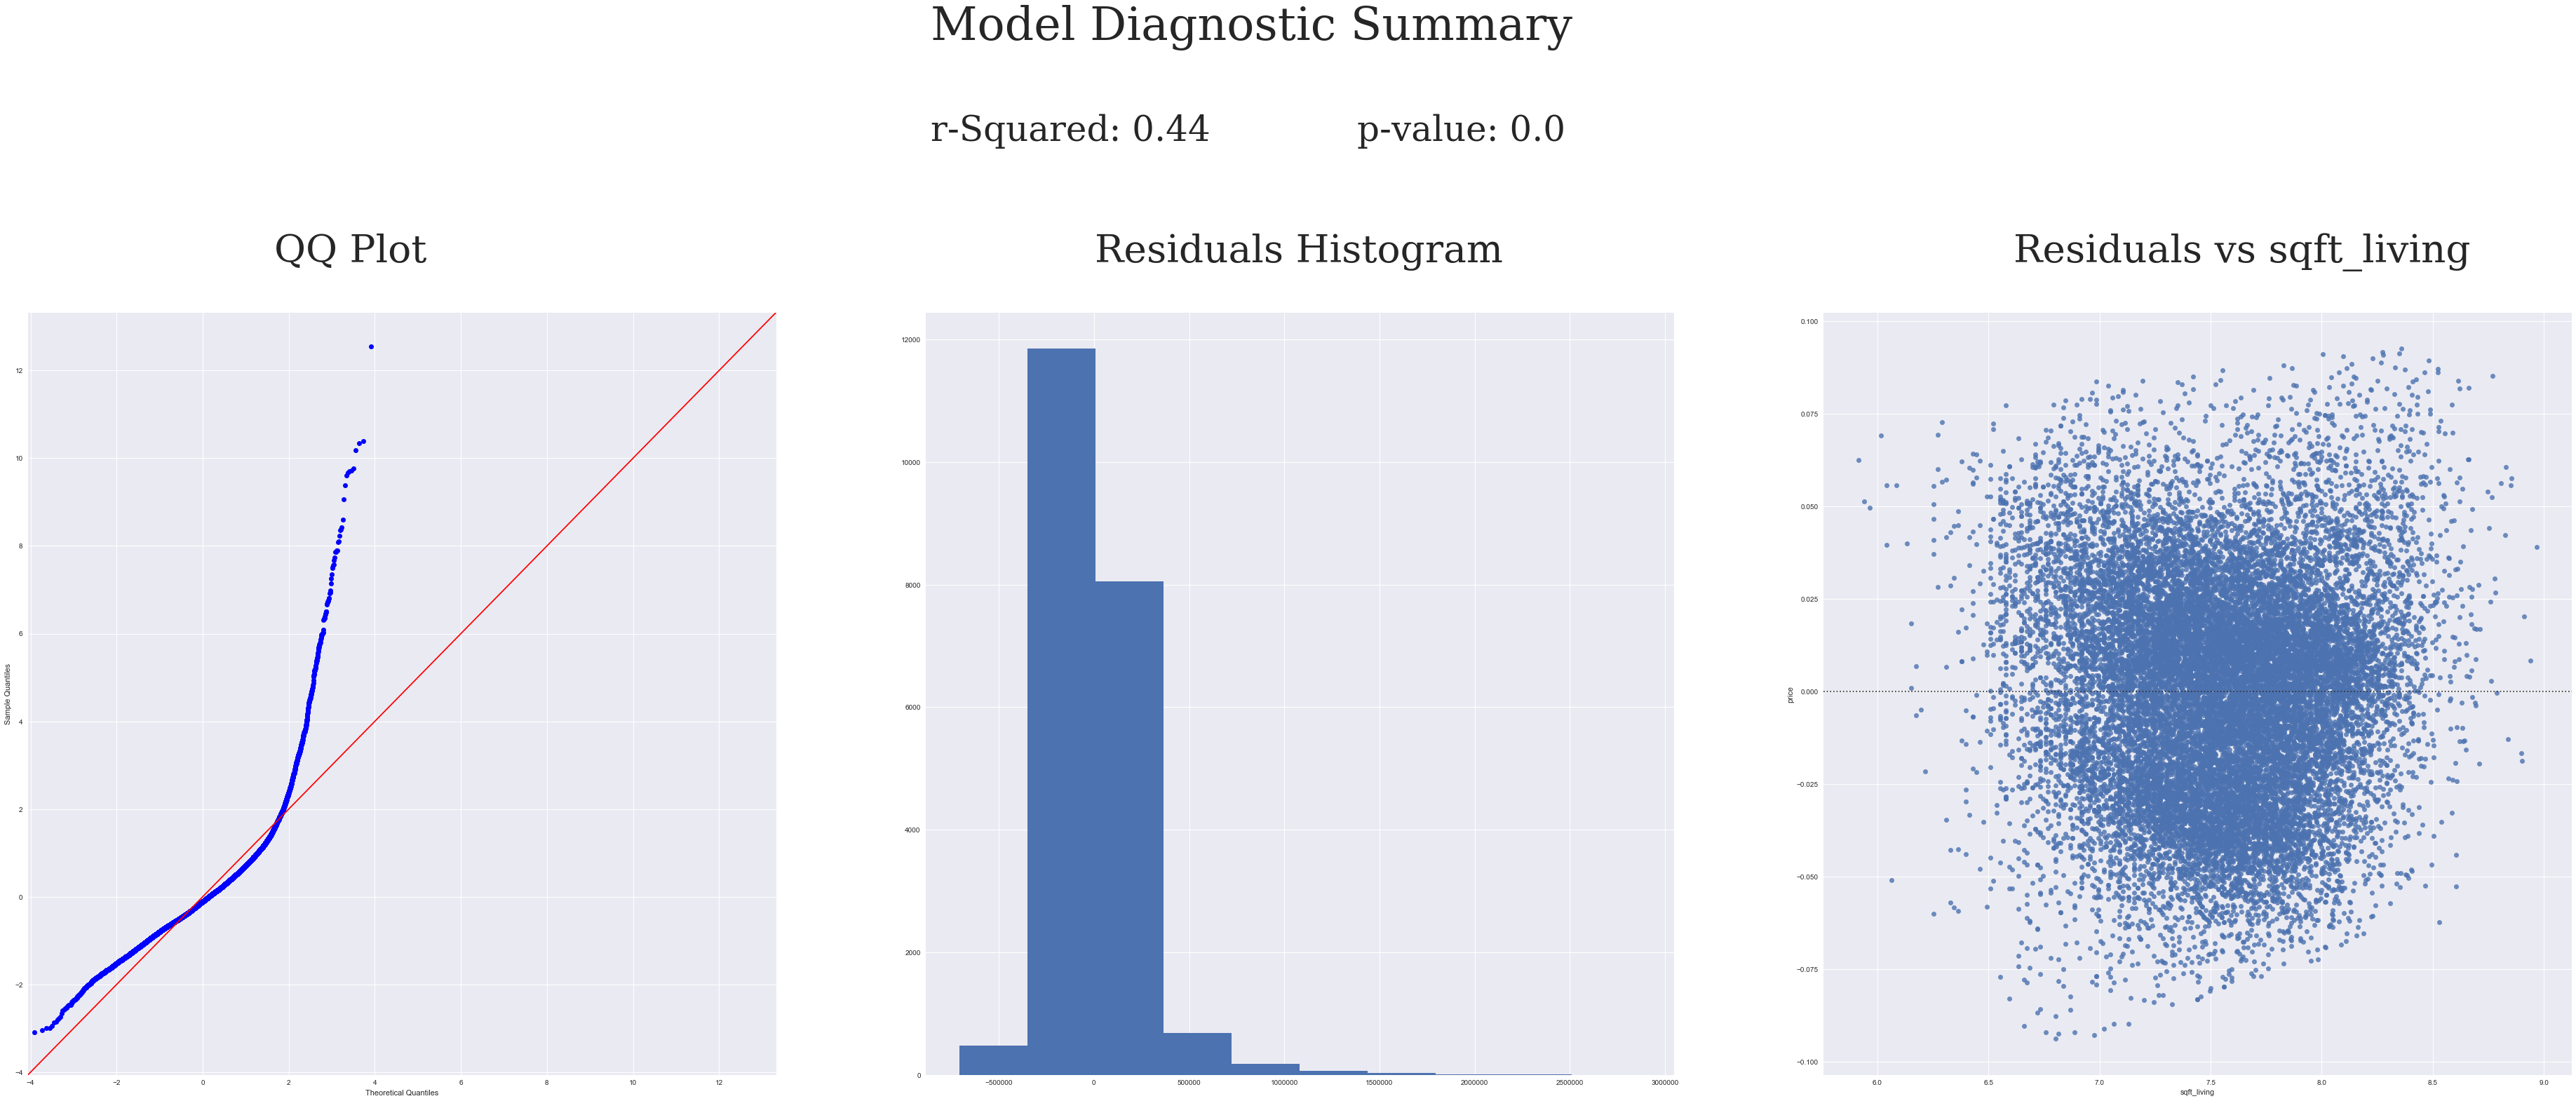

In [26]:
f = "price~sqft_living"
sqft_model = smf.ols(formula=f, data=df).fit()
model_diagnostic(sqft_model, df['sqft_living'], 'sqft_living', price)

### Sqft Living 15

<Figure size 576x396 with 0 Axes>

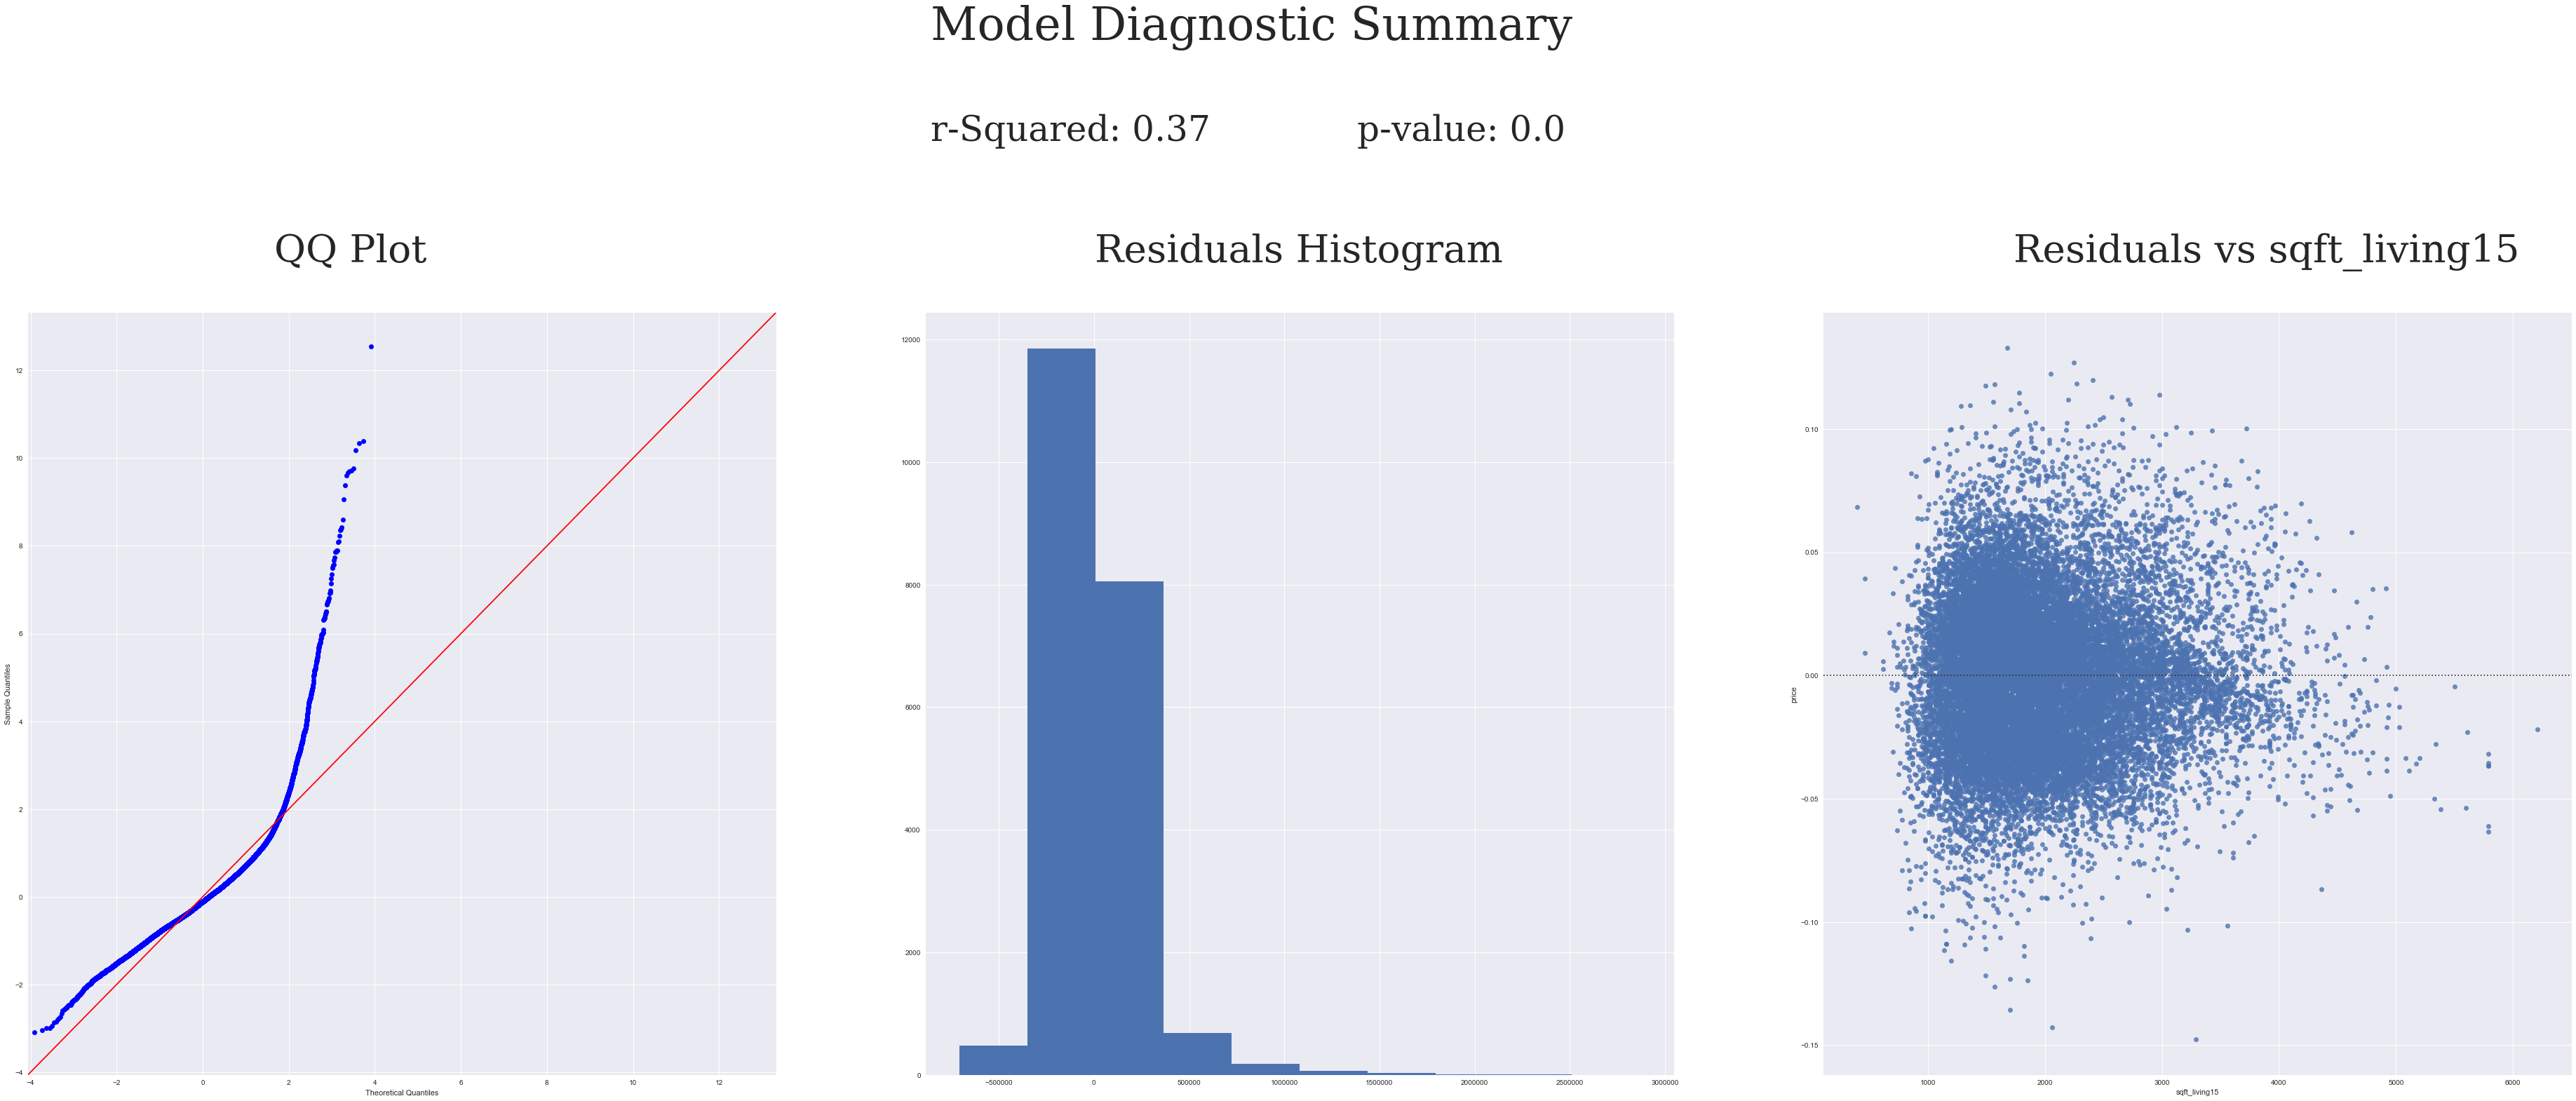

In [27]:
f = 'price~sqft_living15'
sqft15_model = smf.ols(formula=f, data=df).fit()
model_diagnostic(sqft15_model, sqft_living15, 'sqft_living15', price)

In [28]:
df['sqft_living15'] = np.log(df['sqft_living15'])

<Figure size 576x396 with 0 Axes>

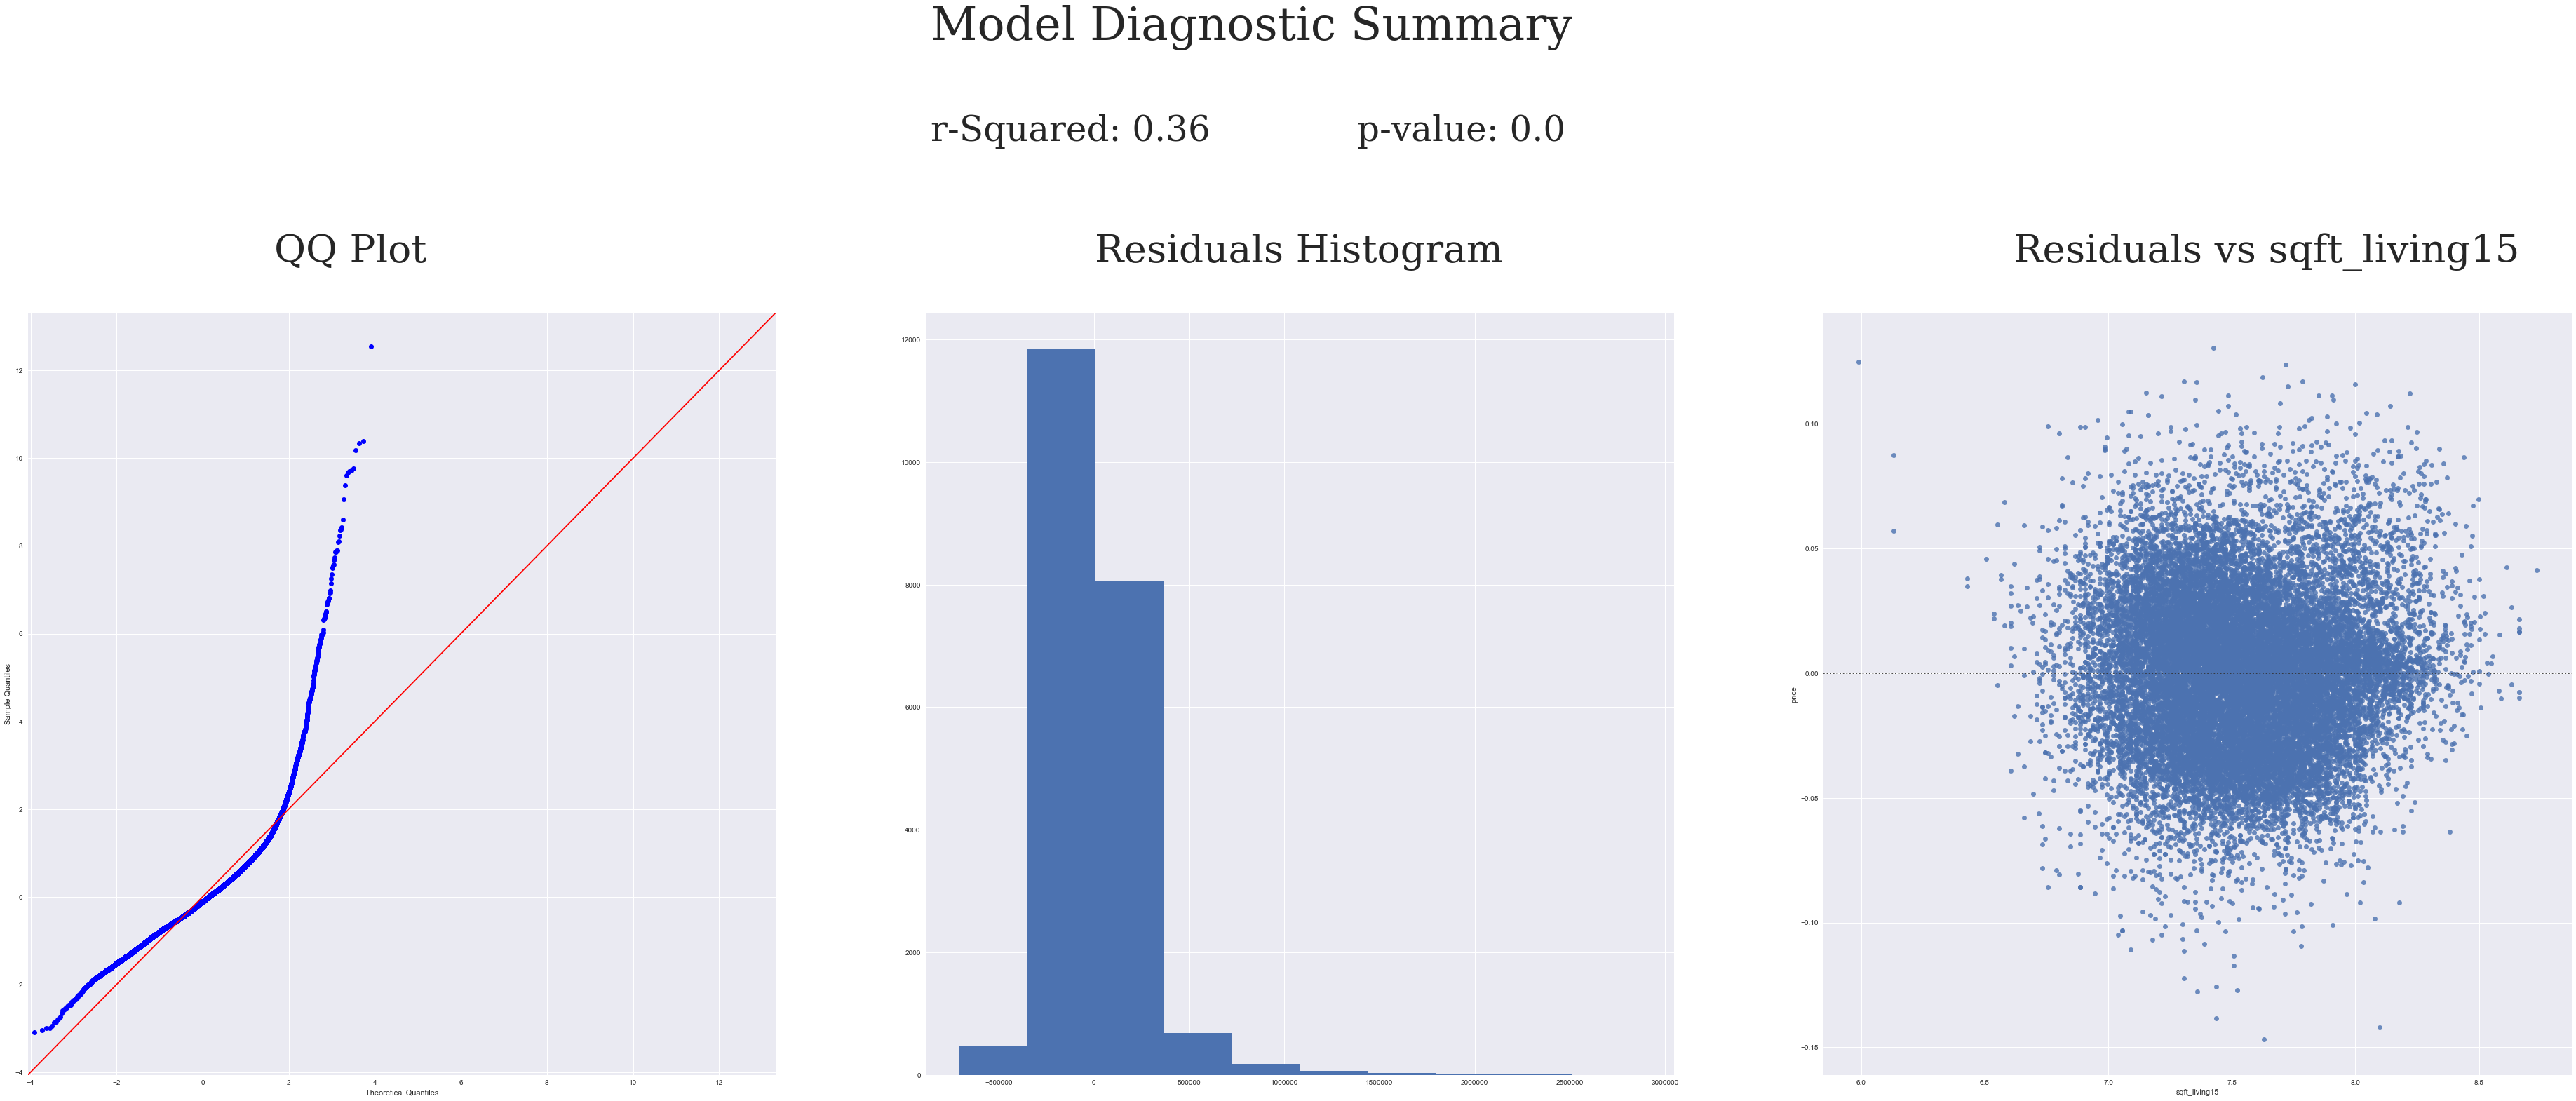

In [29]:
f = "price~sqft_living15"
sqft15_model = smf.ols(formula=f, data=df).fit()
model_diagnostic(sqft15_model, df['sqft_living15'], 'sqft_living15', price)

## Model 3

In [30]:
model3 = smf.ols(formula="price ~ bathrooms + grade + sqft_living + sqft_living15", data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     6059.
Date:                Tue, 15 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:29:42   Log-Likelihood:                 46940.
No. Observations:               21363   AIC:                        -9.387e+04
Df Residuals:                   21358   BIC:                        -9.383e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.1709      0.005    403.244      0.000       2.160       2.181
bathrooms         0.0025      0.000      6.955      0.000       0.002       0.003
grade             0.0136      0.000     54.044      0.000       0.013       0.014
sqft_living       0.0236      0.001     28.324      0.000       0.022       0.025
sqft_living15     0.0144      0.001     16.122      0.000       0.013       0.016
==============================================================================
Omnibus:                       59.194   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.449
Skew:                           0.043   Prob(JB):                     3.02e-11
Kurtosis:                       2.783   Cond. No.                         393.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\daveb\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


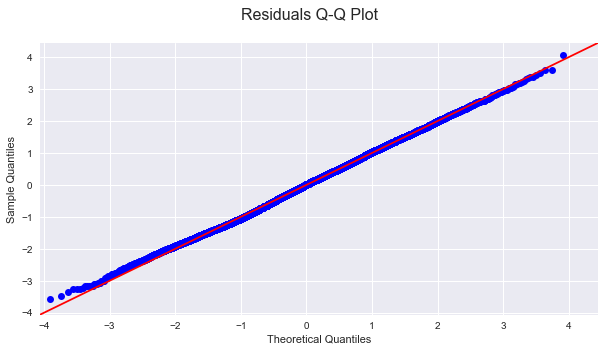

In [31]:
residuals = model3.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals Q-Q Plot', fontsize=16)
fig.set_size_inches(10,5)
fig.show()

## Checking Assumptions

### Homoscedasticity

Text(0.5, 0.99, 'Residuals Scatterplot')

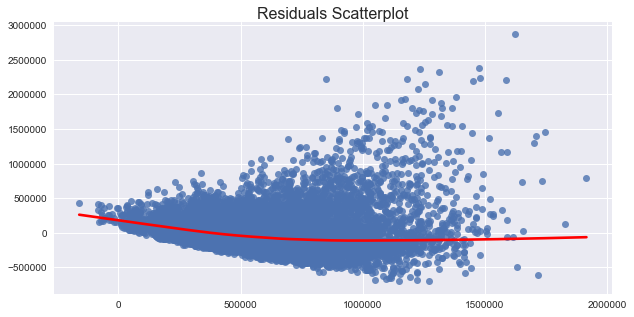

In [33]:
plt.figure(figsize=(10,5))
sns.regplot(x=model1.predict(), y=model1.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', fontsize=16, y=.99)

In [34]:
# the model has a blob shape so it has homoscedasticity

### Model Validation

In [35]:
from sklearn.model_selection import train_test_split

X = df.drop(['price', 'bedrooms', 'sqft_lot', 'floors', 'waterfront', 'sqft_above', 'sqft_basement', 'view', 'condition', 'yr_built', 'yr_renovated', 'sqft_lot15'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X)

       bathrooms  sqft_living  grade  sqft_living15
0            1.0     7.073270      7       7.200425
1            2.0     7.851661      7       7.432484
2            1.0     6.646391      6       7.908387
3            3.0     7.580700      7       7.215240
4            2.0     7.426549      8       7.495542
...          ...          ...    ...            ...
21358        2.0     7.333023      8       7.333023
21359        2.0     7.745003      8       7.512071
21360        1.0     6.927558      7       6.927558
21361        2.0     7.377759      8       7.251345
21362        1.0     6.927558      7       6.927558

[21363 rows x 4 columns]


In [36]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16022 5341 16022 5341


In [37]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [39]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [43]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.0007193695093783627
Test Mean Squarred Error: 0.0007251055588026816
